In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
img=cv2.imread("/home/b160163ec/eeg/0/1.jpg",0)
img=np.asarray(img)

(864, 1536)


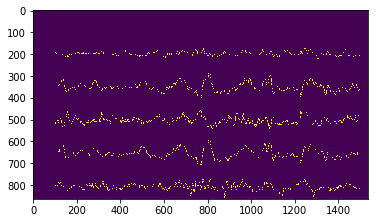

In [32]:
print(img.shape)
plt.imshow(img)

(200, 1336)


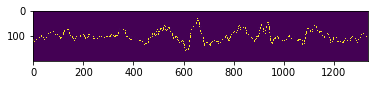

In [34]:
dat=img[250:450,150:-50]
print(dat.shape)
plt.imshow(dat)

In [68]:
def dialation(dat,size):
    dat=np.asarray(dat)
    one=[[0 for i in range(size)]for j in range(size)]
    ans=[]
    for i in range(len(dat)-size+1):
        temp=[]
        for j in range(len(dat[0])-size+1):
            mat=dat[i:i+size,j:j+size]
            flag=True
            for k in range(len(mat)):
                for l in range(len(mat[0])):
                    if mat[k][l]!=one[k][l]:
                        flag=False
            if flag==True:
                temp.append(1)
            else:
                temp.append(0)
        ans.append(temp)
    return ans       

In [39]:
test=dialation(dat,3)

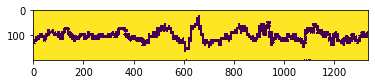

In [40]:
plt.imshow(test)

In [64]:
def x_der(dat):
    dat=np.asarray(dat)
    ans=[]
    fil=[[-1,-2,-1],[0,0,0],[1,2,1]]
    for i in range(len(dat)-len(fil)+1):
        temp=[]
        for j in range(len(dat[0])-len(fil)+1):
            mat=dat[i:i+3,j:j+3]
            temp.append(np.sum(np.dot(mat,fil)))
        ans.append(temp)
    return ans

In [65]:
tes=x_der(test)

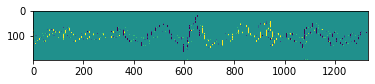

In [66]:
plt.imshow(tes)

In [80]:
def hough(dat):
    dat=np.asarray(dat)
    edges = cv2.Canny(dat,50,150,apertureSize = 3)
    lines = cv2.HoughLines(edges,1,np.pi/180,200)
    for rho,theta in lines[0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    return img

In [81]:
te=hough(tes)

error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/imgproc/src/canny.cpp:947: error: (-215:Assertion failed) _src.depth() == 0 in function 'Canny'
